In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from gym import wrappers
from pandas import DataFrame as df

In [2]:
env = gym.make('Skiing-v0')

[2017-01-26 22:10:30,685] Making new env: Skiing-v0


In [6]:
M = 100
N = 500
for j in range(M):
    r = 0
    for i in range(N):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        r += reward
        if done:
            env.reset()
            print "done, {0} {1} {2}".format(i, j, r)

done, 213 2 -9535.0
done, 157 5 -8282.0
done, 491 7 -10449.0
done, 58 11 -6294.0
done, 407 14 -10563.0
done, 53 18 -9777.0
done, 6 22 -7525.0
done, 401 25 -10035.0
done, 368 28 -10869.0
done, 254 32 -9775.0


KeyboardInterrupt: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a9cfa9510>]], dtype=object)

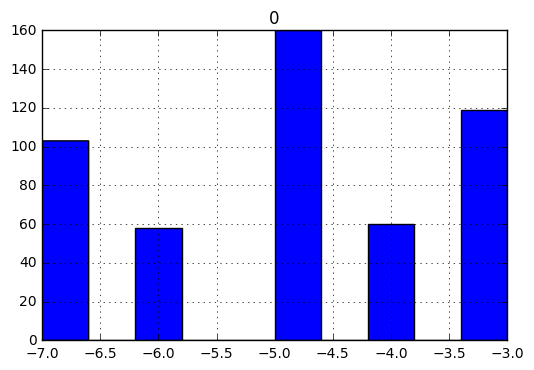

In [31]:
a = df(a)
a.hist()

In [25]:
from universe.wrappers import BlockingReset, GymCoreAction, EpisodeID, Unvectorize, Vectorize, Vision, Logger
import universe
from gym.spaces.box import Box
import cv2
from universe import vectorized

def _process_frame42(frame):
    frame = frame[34:34+160, :160]
    # Resize by half, then down to 42x42 (essentially mipmapping). If
    # we resize directly we lose pixels that, when mapped to 42x42,
    # aren't close enough to the pixel boundary.
    frame = cv2.resize(frame, (80, 80))
    frame = cv2.resize(frame, (42, 42))
    frame = frame.mean(2)
    frame = frame.astype(np.float32)
    frame *= (1.0 / 255.0)
    frame = np.reshape(frame, [42, 42, 1])
    return frame

class AtariRescale42x42(vectorized.ObservationWrapper):
    def __init__(self, env=None):
        super(AtariRescale42x42, self).__init__(env)
        self.observation_space = Box(0.0, 1.0, [42, 42, 1])

    def _observation(self, observation_n):
        return [_process_frame42(observation) for observation in observation_n]
        
def create_atari_env(env_id):
    env = gym.make(env_id)
    env = Vectorize(env)
    env = AtariRescale42x42(env)
    env = Unvectorize(env)
    return env

In [26]:
env = create_atari_env('Skiing-v0')

[2017-01-25 20:53:23,820] Making new env: Skiing-v0
